# Práctica Clase 5

## Ejercicio integrador

Observación: 

>Les recomiendo que para los polinomios de grado elevado, no usen SD/SDG/Mini-Batch porque van a encontrar problemas numêricos. En las próximas clases vamos a hablar de esos problemas numéricos y como solucionarlos.

In [12]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
sys.path.append("../")
from libintroia.linear_regression import LinearRegression

1. Simular una función sin(x) con ruido.

In [45]:
N_SAMPLES = 1000
TRAIN_SPLIT_PERCENT = 0.8
N_PERIODS = 2
NOISE_K = 0.3
x = np.linspace(0,N_PERIODS*(2*np.pi),N_SAMPLES)
y = np.sin(x) + np.random.uniform(low=-NOISE_K,high=NOISE_K,size=N_SAMPLES)

shuffled_indexes = np.random.permutation(len(x))
shuffled_x = x[shuffled_indexes]
shuffled_y = y[shuffled_indexes]

split_index = int(N_SAMPLES*TRAIN_SPLIT_PERCENT)

x_train = shuffled_x[:split_index]
y_train = shuffled_y[:split_index]
x_test = shuffled_x[split_index:]
y_test = shuffled_y[split_index:]

2. Hacer el gráfico de los datos.

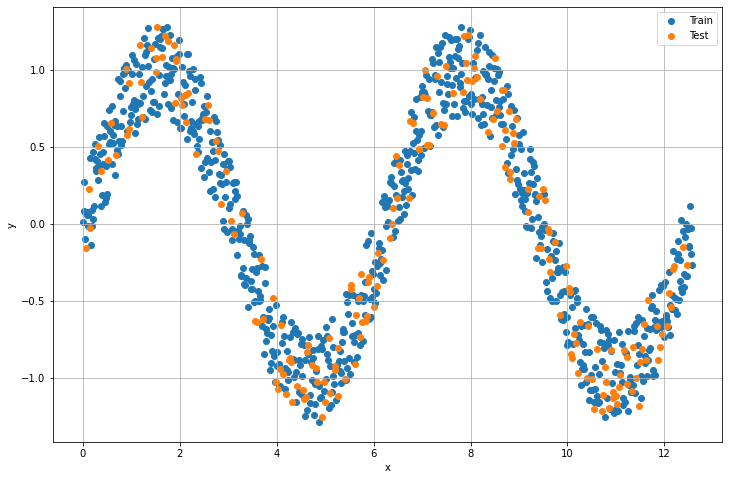

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.grid(which="Both")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Train","Test"])
plt.show()

In [47]:
def plot_model_results(x,y,model_results):
    plt.figure(figsize=(12,8))
    plt.plot(x,y,'o')
    legend= ["Noisy"]
    for m in model_results:
        plt.plot(m["x"],m["y"],'.')
        legend.append(m["legend"])
    plt.grid(which="Both")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(legend)
    plt.show()

In [75]:
model_results = []
x = x_train
y = y_train

3. Hacer fit con y = w1 X + w2.

In [76]:
# Linear
model = LinearRegression()
x_linear = np.vstack((x, np.ones(len(x)))).T
model.fit(x_linear, y.reshape(-1, 1))
w = model.get_model()
y_hat_linear = w[0]*x+w[1]
new_model = {
    "model": model,
    "coeff": 1,
    "x": x,
    "y": y_hat_linear,
    "legend": "linear"
}  
model_results.append( new_model)

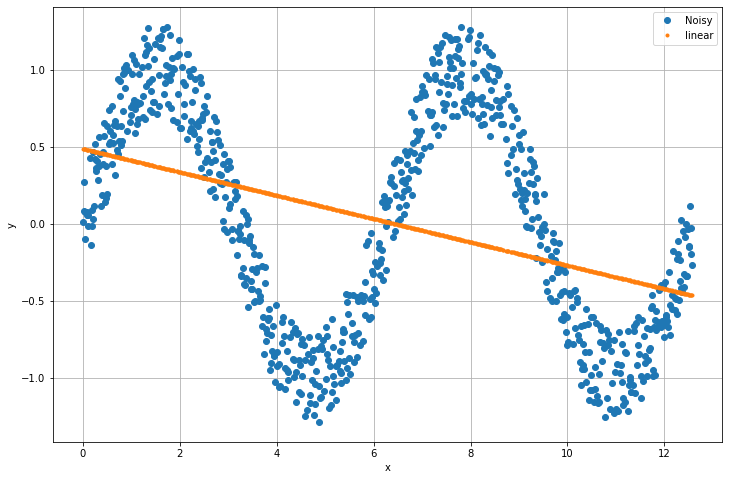

In [77]:
plot_model_results(x,y,model_results)

4. Hacer fit con y = w1 X^2 + w2 X + w3.

In [78]:
# Cuadratic
model = LinearRegression()
x_cuadratic = np.vstack(
    ( x**2,x, np.ones(len(x)) )
).T
model.fit(x_cuadratic, y.reshape(-1, 1))
w = model.get_model()
y_hat_cuadratic = w[0]*x**2 + w[1]*x + w[2]
new_model = {
    "model": model,
    "coeff": 2,
    "x": x,
    "y": y_hat_cuadratic,
    "legend": "Cuadratic"
}  
model_results.append( new_model)

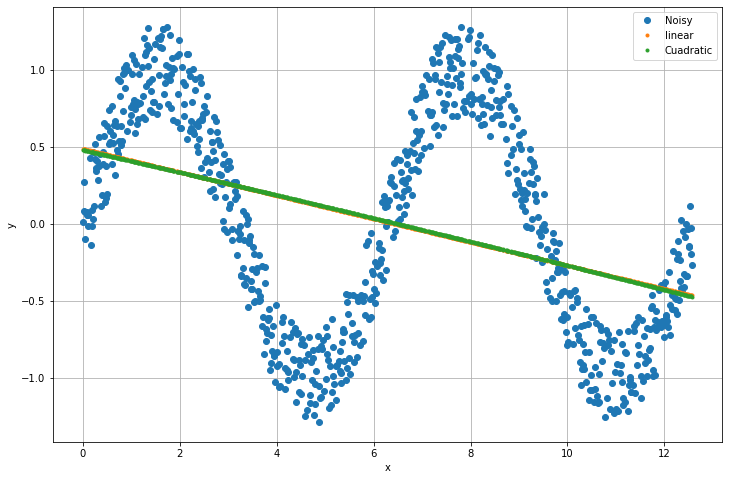

In [79]:
plot_model_results(x,y,model_results)

5. Hacer fir para diferentes polinomios hasta 10.

In [80]:
coeffs = [3,4,5,6,7,8,9,10]
x_coeffs = []
y_hat_coeffs = []
for coeff in coeffs:
    model = LinearRegression()
    x_acc = []
    for c in range(coeff):
        x_acc.append(x**(coeff-c))
    xx = np.vstack(x_acc).T
    model.fit(xx, y.reshape(-1, 1))
    w = model.get_model()
    y_hat = 0
    for c in range(coeff):
        y_hat += w[c]*x**(coeff-c)
    y_hat_coeffs.append(y_hat)    
    new_model = {
        "model": model,
        "coeff": coeff,
        "x": x,
        "y": y_hat,
        "legend": f"x{coeff}"
    }  
    model_results.append(new_model)
    

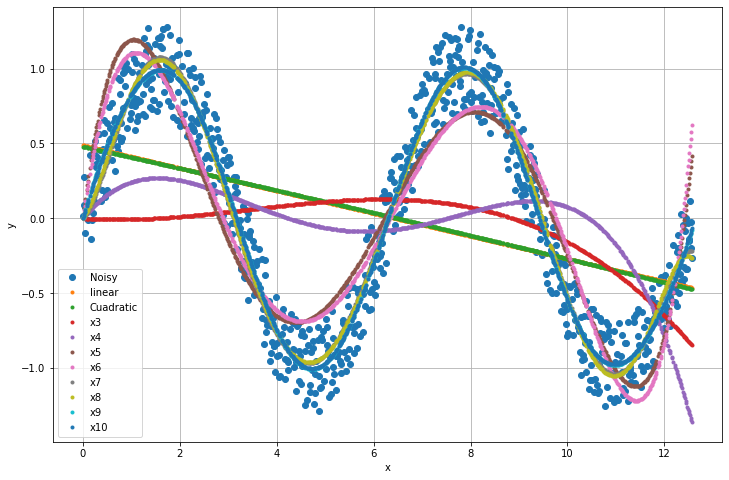

In [81]:
plot_model_results(x,y,model_results)

6. Obtener mediante cross-validation para cada polinomio el error de validación (k-folds).

In [98]:
def train_lr_model_n_coeffs(coeff,x,y):
    model = model = LinearRegression()
    x_acc = []
    for c in range(coeff):
        x_acc.append(x**(coeff-c))
    xx = np.vstack(x_acc).T
    model.fit(xx, y.reshape(-1, 1))
    return model

def make_prediction_n_coeffs(model,x):
    w = model.get_model()
    coeff = w.shape[0]
    y_hat = 0
    for c in range(coeff):
        y_hat += w[c]*x**(coeff-c)    
    return y_hat

Text(0, 0.5, 'MSE')

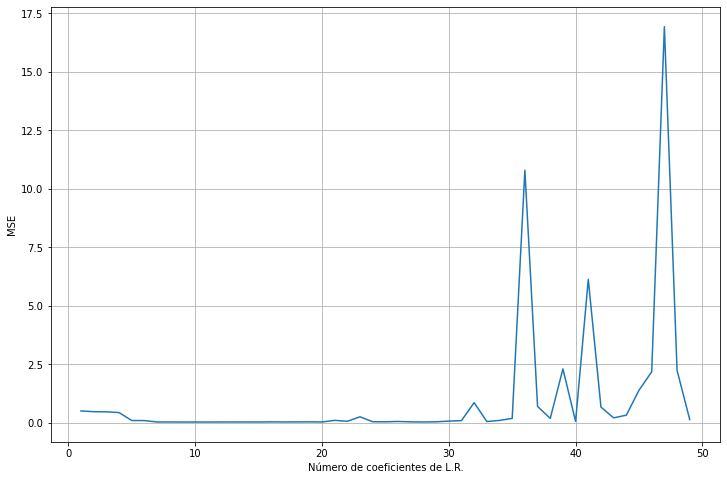

In [117]:
def k_folds_n_coeffs(X_train, y_train, coeff, k=5):
    error = MSE()
    chunk_size = int(len(X_train) / k)
    mse_list = []
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        model = train_lr_model_n_coeffs(coeff,new_X_train,new_y_train)
        prediction = make_prediction_n_coeffs(model,new_X_valid)
        mse_list.append(error(new_y_valid, prediction))

    mean_MSE = np.mean(mse_list)
    return mean_MSE

k_folds_mse_results = []
max_coeffs = 50
for c in range(1,max_coeffs):    
    mean_mse = k_folds_n_coeffs(x_train,y_train,c)
    k_folds_mse_results.append(mean_mse)
    #print(f"Coefficient {c}. Mean MSE: {mean_mse}")
    
    
k_folds_mse_results = np.array(k_folds_mse_results)    
plt.figure(figsize=(12,8))
plt.grid(which="Both")
plt.plot(np.arange(1,max_coeffs),k_folds_mse_results)
plt.xlabel("Número de coeficientes de L.R.")
plt.ylabel("MSE")

In [64]:
from libintroia.metrics import MSE

7. Seleccionar el modelo con complejidad correcta para el dataset (usando el modelo que minimiza el validation error obtenido en 6).

In [127]:
k_folds_mse_results.argmin()

8

8. Obtener el ECM sobre el dataset de test.

In [136]:
metric = MSE()

model = train_lr_model_n_coeffs(8,x_train,y_train)
prediction = make_prediction_n_coeffs(model,x_test)

print("MSE en Test Set:",metric(y_test,prediction))

MSE en Test Set: 0.029317110619960417


9. Regularizar el modelo para mejorar la generalización del modelo (probar agregando mas ruido al sin(x)).

In [14]:
#TODO